In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Загрузка и предобработка данных
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Определение архитектуры модели
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Обучение модели
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.3399 - loss: 1.7723 - val_accuracy: 0.5088 - val_loss: 1.3475
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.5626 - loss: 1.2203 - val_accuracy: 0.6156 - val_loss: 1.0923
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6374 - loss: 1.0338 - val_accuracy: 0.6435 - val_loss: 1.0160
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6816 - loss: 0.9092 - val_accuracy: 0.6781 - val_loss: 0.9260
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7099 - loss: 0.8397 - val_accuracy: 0.6880 - val_loss: 0.9093
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7351 - loss: 0.7655 - val_accuracy: 0.6933 - val_loss: 0.8917
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7487 - loss: 0.7213 - val_accuracy: 0.7063 - val_loss: 0.8641
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7668 -

In [6]:
# Оценка точности
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - 13ms/step - accuracy: 0.7091 - loss: 0.8794

Test accuracy: 0.7091000080108643


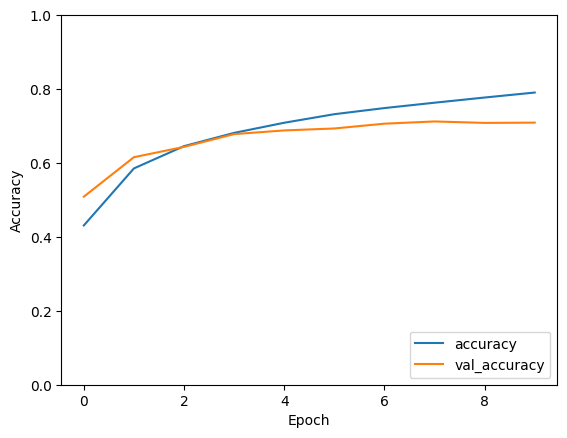

In [7]:
# График точности и потерь на этапе обучения и валидации
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

###Улучшение архитектуры модели

- Добавление дополнительных сверточных слоев: Увеличение количества сверточных слоев позволяет модели лучше извлекать сложные признаки из изображений.
- Использование Batch Normalization: Этот слой нормализует выходные данные каждого слоя, что может ускорить обучение и улучшить стабильность модели.
- Добавление Dropout: Для борьбы с переобучением можно добавить Dropout слои, которые случайным образом "отключают" часть нейронов во время обучения.

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Преимущества:**

Добавление дополнительных слоев и Batch Normalization помогает сети глубже анализировать изображения и ускоряет процесс обучения, уменьшая внутреннее ковариативное смещение. Dropout снижает вероятность переобучения.

**Недостатки:**

Более сложная архитектура требует больше вычислительных ресурсов и времени на обучение.

In [26]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###Увеличение числа эпох и использование Early Stopping
**Проблема:** Ваша модель может не достигать максимальной точности из-за недостаточного количества эпох.

**Решение:** Увеличьте количество эпох и используйте Early Stopping, чтобы избежать переобучения.

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



In [28]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 64ms/step - accuracy: 0.4000 - loss: 1.6557 - val_accuracy: 0.4010 - val_loss: 1.8458
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.6069 - loss: 1.1174 - val_accuracy: 0.6339 - val_loss: 1.0491
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.6628 - loss: 0.9701 - val_accuracy: 0.5527 - val_loss: 1.3336
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.6950 - loss: 0.8863 - val_accuracy: 0.6587 - val_loss: 0.9925
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 66ms/step - accuracy: 0.7181 - loss: 0.8118 - val_accuracy: 0.6995 - val_loss: 0.8715
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.7401 - loss: 0.7649 - val_accuracy: 0.6704 - val_loss: 0.9684
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 64ms/step - accuracy: 0.7533 - loss: 0.7155 - val_accuracy: 0.7098 - val_loss: 0.8566
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 

In [29]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 4s - 14ms/step - accuracy: 0.7457 - loss: 0.7530

Test accuracy: 0.7457000017166138


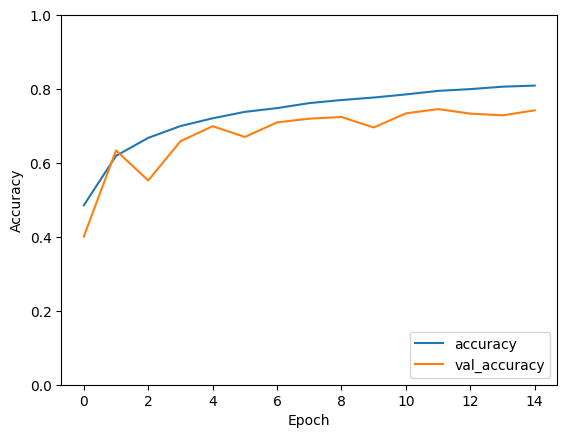

In [30]:
# График точности и потерь на этапе обучения и валидации
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Из полученного графика можно сделать вывод, что показатель точности (accuracy) на тестовых данных увеличил свое значение на 5 пунктов, а значит шаги по добавлению Batch Normalization и Dropout в нашу модель были не напрасны.
Так же нужно отметить, что с увеличением точности упала скорость обучения модели, и это нужно будет учитывать, при выборе вариаты модели обучения нейроной сети. Стоит обратить внимание, что изменение оптеимзатора или дальнейшем увеличение слоев метрика точности будет падать, с чем это связано - тема для глубокого анализа, но данные получены, при проведение многочисленных опытов.